# A2 - Introdução à Ciência de Dados
Análise exploratória utilizando Python\
Base escolhida: [Credit Card Customers](https://www.kaggle.com/sakshigoyal7/credit-card-customers)

# Preparação

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Leitura e limpeza dos dados

In [44]:
bankc = pd.read_csv("BankChurners.csv")
bankc.drop([col for col in bankc.columns if 'Naive' in col], axis = 1, inplace = True)
bankc.replace('Existing Customer', False, inplace = True)
bankc.replace('Attrited Customer', True, inplace = True)
bankc.rename(columns={'Attrition_Flag':'Churn'}, inplace = True)
bankc

,CLIENTNUM,Churn,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,False,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,False,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,False,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,False,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,False,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,False,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,True,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,True,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,True,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


# Fatores relevantes para o churn
Antes de tudo, é interessante verificar a proporção de dados (Churn ou não) em nossa base.

In [45]:
bankc['Churn'].value_counts()

False    8500
True     1627
Name: Churn, dtype: int64

Dividindo os dados em duas tabelas (Churn ou não).

In [46]:
bankChurn = bankc.loc[bankc['Churn']==True]
bankCustomer = bankc.loc[bankc['Churn']==False]

A seguir alguns gráficos que comparam variáveis em caso de churn x não churn

[Text(200.36818181818177, 0.5, 'Contagem'),
 Text(0.5, 15.0, 'Nível de Educação')]

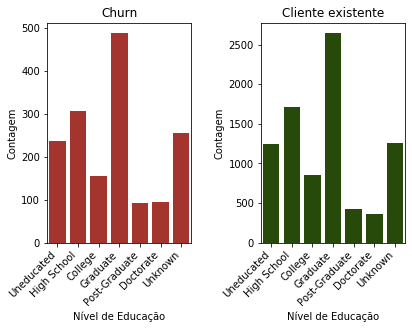

In [56]:
fig, axs = plt.subplots(ncols=2)
Red = "#265500"
Green = "#b7241b"

ordem = ['Uneducated','High School','College','Graduate','Post-Graduate','Doctorate','Unknown']

sns.countplot(x = 'Education_Level', data = bankChurn, color=Green, order=ordem, ax=axs[0])
sns.countplot(x = 'Education_Level', data = bankCustomer, color=Red, order=ordem  , ax=axs[1])

fig.tight_layout()
fig.autofmt_xdate(rotation=45)

axs[0].title.set_text("Churn")
axs[1].title.set_text("Cliente existente")

axs[0].set(xlabel="Nível de Educação", ylabel= "Contagem")
axs[1].set(xlabel="Nível de Educação", ylabel= "Contagem")


Podemos observar que as distribuições são muito semelhantes.

[Text(200.36818181818177, 0.5, 'Contagem'),
 Text(0.5, 15.0, 'Meses inativos (12 meses)')]

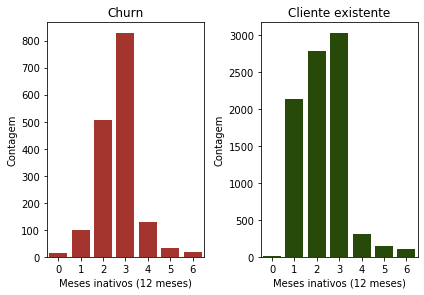

In [55]:
fig, axs = plt.subplots(ncols=2)

ordem = []

sns.countplot(x = 'Months_Inactive_12_mon', data = bankChurn, color=Green, ax=axs[0])
sns.countplot(x = 'Months_Inactive_12_mon', data = bankCustomer, color=Red, ax=axs[1])

fig.tight_layout()

axs[0].title.set_text("Churn")
axs[1].title.set_text("Cliente existente")

axs[0].set(xlabel="Meses inativos (12 meses)", ylabel= "Contagem")
axs[1].set(xlabel="Meses inativos (12 meses)", ylabel= "Contagem")

Já nessa comparação, podemos observar que os clientes existentes possuem sua distribuição mais frequente nos menores números de meses inativos, o que faz sentido, já que espera-se que clientes ativos não deixem o banco.

[Text(200.36818181818177, 0.5, 'Contagem'),
 (0, 6.5),
 Text(0.5, 15.0, 'Contatos com o banco (12 meses)')]

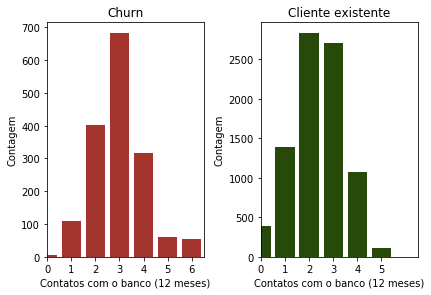

In [73]:
fig, axs = plt.subplots(ncols=2)

sns.countplot(x = 'Contacts_Count_12_mon', data = bankChurn, color=Green, ax=axs[0])
sns.countplot(x = 'Contacts_Count_12_mon', data = bankCustomer, color=Red , ax=axs[1])

fig.tight_layout()

axs[0].title.set_text("Churn")
axs[1].title.set_text("Cliente existente")

axs[0].set(xlabel="Contatos com o banco (12 meses)", ylabel= "Contagem", xlim=(0,6.5))
axs[1].set(xlabel="Contatos com o banco (12 meses)", ylabel= "Contagem", xlim=(0,6.5))

Já nessa comparação, podemos observar que clientes contactam o banco com maior frequência quando comparados aos clientes que ainda estão ativos.

[Text(206.74318181818177, 0.5, 'Contagem'),
 (0, 150),
 Text(0.5, 15.0, 'Número de transações')]

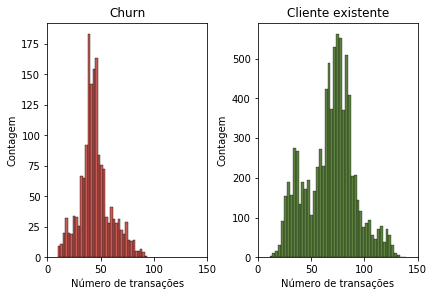

In [78]:
fig, axs = plt.subplots(ncols=2)

sns.histplot(x = 'Total_Trans_Ct', data = bankChurn, color=Green, ax=axs[0])
sns.histplot(x = 'Total_Trans_Ct', data = bankCustomer, color=Red ,ax=axs[1])

fig.tight_layout()

axs[0].title.set_text("Churn")
axs[1].title.set_text("Cliente existente")

axs[0].set(xlabel="Número de transações", ylabel= "Contagem", xlim = (0,150))
axs[1].set(xlabel="Número de transações", ylabel= "Contagem", xlim = (0,150))

Podemos observar que os clientes ativos possuem uma frequência maior em um número de transações maiores, enquanto em os que ocorreram Churn há uma concentração maior em um número de transações menor, o que faz sentido, já que espera-se que os clientes ativos façam um maior número de transações.